Animals project

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
from Animal_Adoption.preproc.data_dog import get_data_dogs

In [3]:
df = get_data_dogs()

In [4]:
# Import dataframe from final_df_dogs_and_dogbreeds - final_df_dogs_and_dogbreeds.csv
#csv_file_path = "/home/john/code/joagap/animals/final_df_dogs_and_dogbreeds - final_df_dogs_and_dogbreeds.csv"
#df = pd.read_csv(csv_file_path)
#print(df.head())

In [5]:
df.head()

,date_of_birth,sex_upon_outcome,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),...,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,min_weight_female,name
0,2007-07-09,Neutered Male,10 years,Dog,spinone italiano,Yellow/White,Normal,Stray,Neutered Male,10.0,...,12.0,27.0,27.0,86.0,75.0,23.0,23.0,75.0,64.0,Spinone Italiano
1,2007-07-09,Neutered Male,7 years,Dog,spinone italiano,Yellow/White,Normal,Public Assist,Neutered Male,7.0,...,12.0,27.0,27.0,86.0,75.0,23.0,23.0,75.0,64.0,Spinone Italiano
2,2007-07-09,Neutered Male,6 years,Dog,spinone italiano,Yellow/White,Normal,Public Assist,Neutered Male,6.0,...,12.0,27.0,27.0,86.0,75.0,23.0,23.0,75.0,64.0,Spinone Italiano
3,2004-04-02,Neutered Male,10 years,Dog,dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,...,16.0,9.0,9.0,32.0,32.0,8.0,8.0,16.0,16.0,Dachshund
4,1997-10-03,Neutered Male,16 years,Dog,dachshund,Black/Tan,Normal,Owner Surrender,Neutered Male,16.0,...,16.0,9.0,9.0,32.0,32.0,8.0,8.0,16.0,16.0,Dachshund


In [6]:
print(df.columns)

Index(['date_of_birth', 'sex_upon_outcome', 'age_upon_intake', 'animal_type',
       'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(years)', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_weekday', 'intake_hour', 'intake_number',
       'time_in_shelter', 'time_in_shelter_days', 'breed_type', 'sex_type',
       'sex', 'image_link', 'good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking', 'min_life_expectancy', 'max_life_expectancy',
       'max_height_male', 'max_height_female', 'max_weight_male',
       'max_weight_female', 'min_height_male', 'min_height_female',
       'min_weight_male', 'min_weight_female', 'name'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45366 entries, 0 to 45365
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_of_birth            45365 non-null  datetime64[ns]
 1   sex_upon_outcome         45365 non-null  object        
 2   age_upon_intake          45365 non-null  object        
 3   animal_type              45365 non-null  object        
 4   breed                    45366 non-null  object        
 5   color                    45365 non-null  object        
 6   intake_condition         45365 non-null  object        
 7   intake_type              45365 non-null  object        
 8   sex_upon_intake          45365 non-null  object        
 9   age_upon_intake_(years)  45365 non-null  float64       
 10  intake_datetime          45365 non-null  datetime64[ns]
 11  intake_month             45365 non-null  float64       
 12  intake_year              45365 n

In [8]:
df.color.unique()

array(['Yellow/White', 'Tricolor', 'Black/Tan', 'Brown', 'Red',
       'Black/Brown Brindle', 'Tan/White', 'Black/Brown',
       'Blue Merle/White', 'Brown/Black', 'Black/White', 'Red Tick/Red',
       'White/Brown', 'Blue Tick/Black', 'Black', 'Brown/White',
       'Red/Brown', 'Blue Merle/Brown', 'Tricolor/Black', 'White/Tan',
       'Black/Black Brindle', 'Blue Merle', 'Tan', 'Chocolate/Tricolor',
       'Red/Buff', 'Brown Brindle/White', 'Tan/Buff', 'White/Red Merle',
       'Red/White', 'Cream/White', 'White/Red', 'White/Blue Merle',
       'White/Black', 'Black/Silver', 'Red/Black', 'Blue/Tan',
       'Red Merle/White', 'Blue/White', 'Red/Red Merle', 'Sable',
       'Brown Brindle', 'Cream', 'Brown/Tan', 'Black/Tricolor',
       'Tricolor/Chocolate', 'Red Tick/White', 'White', 'Sable/Tan',
       'Tan/Black', 'Gray/White', 'Chocolate/Tan', 'Tricolor/Tan',
       'Tricolor/White', 'Buff/White', 'Sable/White', 'Buff',
       'Blue Merle/Black', 'Brown/Chocolate', 'Chocolate/White',

PIPELINE TO PREPARE THE DATA FOR LR

In [9]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix['time_in_shelter_days'])

age_upon_intake_(years)    0.034027
intake_month              -0.003886
intake_year               -0.014667
intake_hour               -0.004710
intake_number              0.006092
time_in_shelter_days       1.000000
good_with_children        -0.004993
good_with_other_dogs       0.004064
shedding                   0.029504
grooming                  -0.074597
drooling                   0.012830
coat_length               -0.036839
good_with_strangers       -0.010305
playfulness               -0.049893
protectiveness            -0.027332
trainability               0.010851
energy                    -0.007877
barking                   -0.072353
min_life_expectancy       -0.028018
max_life_expectancy       -0.044875
max_height_male            0.071045
max_height_female          0.067518
max_weight_male            0.074806
max_weight_female          0.078299
min_height_male            0.065044
min_height_female          0.065193
min_weight_male            0.073010
min_weight_female          0

/tmp/ipykernel_12205/1906059457.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


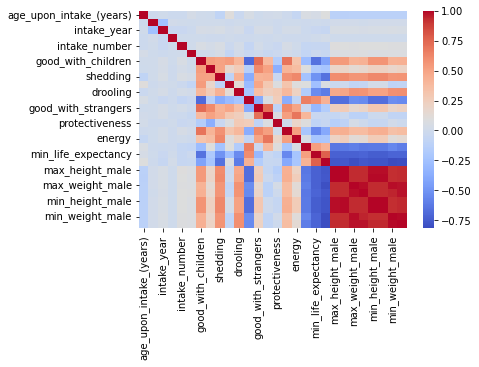

In [11]:
# Create a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [12]:
from sklearn.base import TransformerMixin, BaseEstimator

class ColorTransformer(TransformerMixin, BaseEstimator):
    
    def __init__(self):
        super()
        self.vectorizer = CountVectorizer()
        
    def fit(self, X, y=None):
        X = X['color'].map(lambda x: " ".join(x.split("/")))
        self.vectorizer.fit(X)
        return self
    
    def transform(self, X, y=None):
        X = X['color'].map(lambda x: " ".join(x.split("/")))
        transformed = self.vectorizer.transform(X)
        columns = self.vectorizer.get_feature_names_out()
        return pd.DataFrame(transformed.toarray(), columns=columns)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
color_transformer = ColorTransformer()

In [15]:
df.columns

Index(['date_of_birth', 'sex_upon_outcome', 'age_upon_intake', 'animal_type',
       'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(years)', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_weekday', 'intake_hour', 'intake_number',
       'time_in_shelter', 'time_in_shelter_days', 'breed_type', 'sex_type',
       'sex', 'image_link', 'good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking', 'min_life_expectancy', 'max_life_expectancy',
       'max_height_male', 'max_height_female', 'max_weight_male',
       'max_weight_female', 'min_height_male', 'min_height_female',
       'min_weight_male', 'min_weight_female', 'name'],
      dtype='object')

In [16]:
#color_transformer.fit_transform(df[['color']])

In [17]:
# Define the features and target variable
features = ['age_upon_intake_(years)', 'breed_type', 'intake_condition', 'sex', 'sex_type', 'good_with_children',
            'good_with_other_dogs','shedding', 'grooming', 'drooling', 'coat_length','good_with_strangers', 
            'playfulness', 'protectiveness', 'trainability','energy', 'barking', 'min_life_expectancy', 
            'max_life_expectancy','max_height_male', 'max_height_female', 'max_weight_male','max_weight_female', 
            'min_height_male', 'min_height_female','min_weight_male', 'min_weight_female']

target = 'time_in_shelter_days'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [18]:
# Define the features and target variable
#df_ = df.copy()
#df_.dropna(inplace=True)

# Split the data into training and test sets
#X_train_, X_test_, y_train_, y_test_ = train_test_split(df_[features], df_[target], test_size=0.2, random_state=42)

In [19]:
# Ensure that the shapes are correct
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (36292, 27)
Shape of y_train: (36292,)
Shape of X_test: (9074, 27)
Shape of y_test: (9074,)


In [20]:
# create a list of numerical columns and categorical columns
numeric_features = ['age_upon_intake_(years)', 'good_with_children','good_with_other_dogs',
                    'shedding', 'grooming', 'drooling', 'coat_length','good_with_strangers', 
                    'playfulness', 'protectiveness', 'trainability','energy', 'barking', 
                    'min_life_expectancy', 'max_life_expectancy','max_height_male', 'max_height_female', 
                    'max_weight_male','max_weight_female', 'min_height_male', 'min_height_female',
                    'min_weight_male', 'min_weight_female']


categorical_features = ['breed_type','intake_condition', 'sex', 'sex_type']


# create the transformer for numerical columns
numeric_transformer = make_pipeline(StandardScaler())

# create the transformer for categorical columns
categorical_transformer = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))


# use ColumnTransformer to specify which columns need to be preprocessed in what way
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        #('color', ColorTransformer(), ['color'])
    ])

In [21]:
# create the pipeline for linear regression with preprocessor
pipeline = make_pipeline(preprocessor)

In [22]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)',
                                                   'good_with_children',
                                                   'good_with_other_dogs',
                                                   'shedding', 'grooming',
                                                   'drooling', 'coat_length',
                                                   'good_with_strangers',
                                                   'playfulness',
                                                   'protectiveness',
                                                   'trainability', 'energy',
                                                   'barking',
                                                   'min_life_expectancy',
                                                   'max_life_expectancy',
                                                   'max_height_male',
                                                   'max_height_female',
                                                   'max_weight_male',
                                                   'max_weight_female',
                                                   'min_height_male',
                                                   'min_height_female',
                                                   'min_weight_male',
                                                   'min_weight_female']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['breed_type',
                                                   'intake_condition', 'sex',
                                                   'sex_type'])]))])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Transform
X_train_transformed = pd.DataFrame(pipeline.transform(X_train))


In [32]:
X_train_transformed.shape

(36292, 44)

In [33]:
X_train.columns

Index(['age_upon_intake_(years)', 'breed_type', 'intake_condition', 'sex',
       'sex_type', 'good_with_children', 'good_with_other_dogs', 'shedding',
       'grooming', 'drooling', 'coat_length', 'good_with_strangers',
       'playfulness', 'protectiveness', 'trainability', 'energy', 'barking',
       'min_life_expectancy', 'max_life_expectancy', 'max_height_male',
       'max_height_female', 'max_weight_male', 'max_weight_female',
       'min_height_male', 'min_height_female', 'min_weight_male',
       'min_weight_female'],
      dtype='object')

In [35]:
df.isnull().sum()

date_of_birth                  1
sex_upon_outcome               1
age_upon_intake                1
animal_type                    1
breed                          0
color                          1
intake_condition               1
intake_type                    1
sex_upon_intake                1
age_upon_intake_(years)        1
intake_datetime                1
intake_month                   1
intake_year                    1
intake_weekday                 1
intake_hour                    1
intake_number                  1
time_in_shelter                1
time_in_shelter_days           1
breed_type                     1
sex_type                       1
sex                            1
image_link                 14690
good_with_children         14690
good_with_other_dogs       14690
shedding                   14690
grooming                   14690
drooling                   14690
coat_length                14690
good_with_strangers        14690
playfulness                14690
protective

In [29]:
X_train_transformed.isnull().sum()

0         1
1     11773
2     11773
3     11773
4     11773
5     11773
6     11773
7     11773
8     11773
9     11773
10    11773
11    11773
12    11773
13    11773
14    11773
15    11773
16    11773
17    11773
18    11773
19    11773
20    11773
21    11773
22    11773
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
dtype: int64

In [25]:
# Add LinearRegression() to the pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)',
                                                   'good_with_children',
                                                   'good_with_other_dogs',
                                                   'shedding', 'grooming',
                                                   'drooling', 'coat_length',
                                                   'good_with_strangers',
                                                   'playfulness',
                                                   'protectiveness',
                                                   'trainability', 'energy',
                                                   'barking',
                                                   'min_life_expectancy',
                                                   'max_life_expectancy',
                                                   'max_height_male',
                                                   'max_height_female',
                                                   'max_weight_male',
                                                   'max_weight_female',
                                                   'min_height_male',
                                                   'min_height_female',
                                                   'min_weight_male',
                                                   'min_weight_female']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['breed_type',
                                                   'intake_condition', 'sex',
                                                   'sex_type'])])),
                ('regressor', LinearRegression())])

LINEAR REGRESION

In [27]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['age_upon_intake_(years)',
                                     'good_with_children', 'good_with_other_dogs',
                                     'shedding', 'grooming', 'drooling',
                                     'coat_length', 'good_with_strangers',
                                     'playfulness', 'protectiveness',
                                     'trainability', 'energy', 'barking',
                                     'min_life_expectancy', 'max_life_expectancy',
                                     'max_height_male', 'max_height_female',
                                     'max_weight_male', 'max_weight_female',
                                     'min_height_male', 'min_height_female',
              

In [28]:
# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

/home/john/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [111]:
y_pred

array([-7.0027307e+13, -7.0027307e+13, -7.0027307e+13, ...,
       -7.0027307e+13, -7.0027307e+13, -7.0027307e+13])

In [116]:
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_, y_pred)
mae = mean_absolute_error(y_test_, y_pred)
print("Mean Squared Error:", mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 4.9038237319008235e+27
Mean Absolute Error: 70027307044472.47


In [115]:
# Calculate evaluation metrics r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test_, y_pred)
print('R-squared:', r2)

R-squared: -3.6183465648151775e+24


In [24]:
model_pipeline.steps[1][1]

LinearRegression()

In [25]:
# Get the coefficient values
coef = model_pipeline.named_steps['regressor'].coef_

# Get the intercept value
intercept = model_pipeline.named_steps['regressor'].intercept_

# Print the summary
print("Coefficient values:", coef)
print("Intercept value:", intercept)

Coefficient values: [ 1.11586379e+00  1.30322586e+13  1.30322586e+13 -2.43165056e+13
 -2.43165056e+13 -2.43165056e+13 -2.43165056e+13 -2.43165056e+13
 -2.43165056e+13 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12 -1.37551872e+12
 -1.28378442e+13 -1.28378442e+13 -1.28378442e+13 -1.28378442e+13
 -1.2

In [61]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter Grid
grid = {
    'alpha': [0.01, 0.1, 1],
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Instantiate Grid Search
search = GridSearchCV(
    model_pipeline,
    grid,
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 #parallelize computation
)

# Fit data to Grid Search
search.fit(X_train, y_train)

ValueError: Invalid parameter 'alpha' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['animal_type', 'breed',
                                                   'intake_condition', 'sex',
                                                   'sex_type'])])),
                ('regressor', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned using a dictionary:
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

#  Instantiate the GridSearchCV object:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5)

#Fit the GridSearchCV object on the training data:
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'fit_intercept' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['animal_type', 'breed',
                                                   'intake_condition', 'sex',
                                                   'sex_type'])])),
                ('regressor', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)